In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# t = np.linspace(-2*np.pi, 2*np.pi, 100)
# t = np.arange(0, 0.5, 0.001)
# x_t = np.piecewise(t, [(t >= 0)*(t < 0.1), (t >= 0.1)*(t < 0.2), (t < 0)*(t >= 0.2)], [2, -4, 0])

In [3]:

import numpy as np

def rule_1():
    return 2

def rule_2():
    return -4

def rule_3():
    return 0

# Generate the piecewise signal
def generate_piecewise_signal(t):
    if 0 < t < 0.1:
        return rule_1()
    elif 0.1 <= t < 0.2:
        return rule_2()
    else:
        return rule_3()

t = np.arange(0, 0.5, 0.001)
x_t = np.array([generate_piecewise_signal(x) for x in t])

f_c = 300

carrier = np.cos(2 * np.pi * f_c * t)

n_a = 0.9
m_t = (1 + n_a * x_t) * np.cos(2 * np.pi * f_c * t)




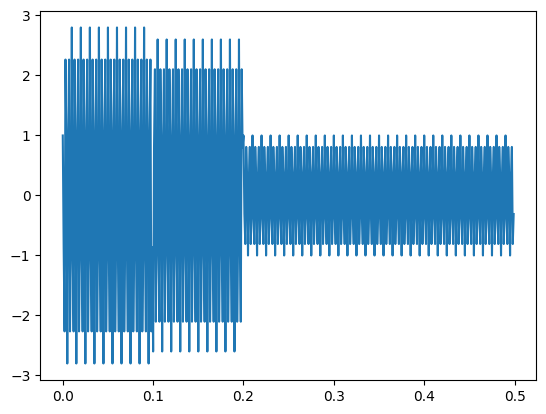

In [4]:
plt.plot(t, m_t)

plt.show()

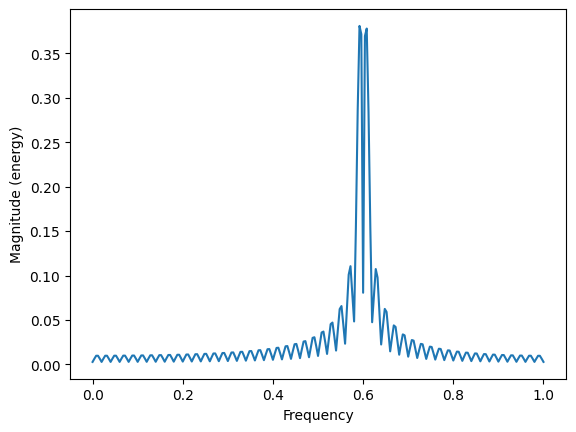

In [5]:
plt.magnitude_spectrum(m_t)
plt.show(any(m_t))

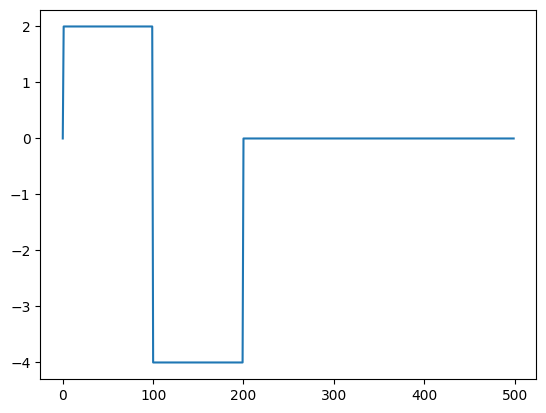

In [6]:
recovered_message = ((m_t / np.cos(2*np.pi*f_c*t)) -1) / n_a
plt.plot(recovered_message)
plt.show()

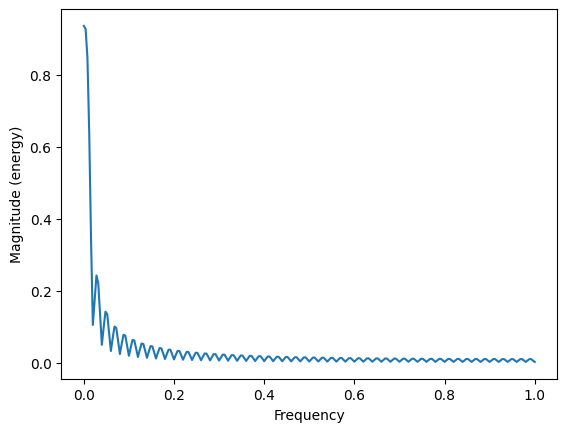

In [7]:
plt.magnitude_spectrum(recovered_message)
plt.show()

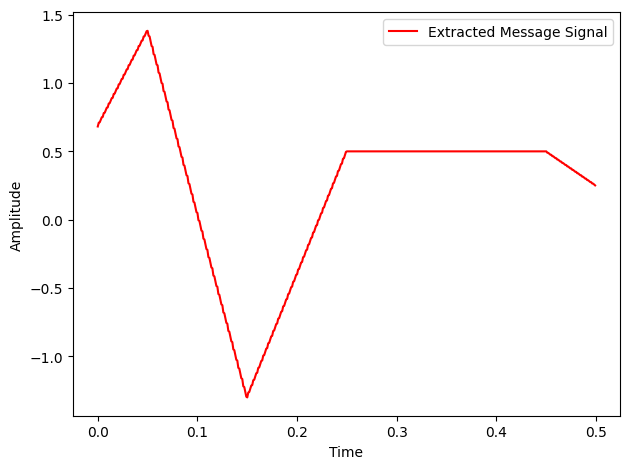

In [8]:

# Demodulation and message signal extraction
demodulated_signal = m_t * np.cos(2 * np.pi * f_c * t)  # Demodulated signal
extracted_message = np.convolve(demodulated_signal, np.ones(100)/100, mode='same')  # Extracted message signal

# plt.subplot(3, 1, 3)
plt.plot(t, extracted_message, 'r', label='Extracted Message Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
